# 1.Count

In [1]:
urls = [
"http://www.google.com/a.txt",
"http://www.google.com.tw/a.txt",
"http://www.google.com/download/c.jpg",
"http://www.google.co.jp/a.txt",
"http://www.google.com/b.txt",
"https://facebook.com/movie/b.txt",
"http://yahoo.com/123/000/c.jpg",
"http://gliacloud.com/haha.png",
]

#### solution 1

In [2]:
urls = [url.split("/")[-1] for url in urls]
urls

['a.txt', 'a.txt', 'c.jpg', 'a.txt', 'b.txt', 'b.txt', 'c.jpg', 'haha.png']

In [3]:
dic={}
for i in urls:
    if dic.get(i):
        dic[i]+=1
    else :
        dic[i]=1

urls_count=[(key,dic[key]) for key in dic.keys()]
urls_count.sort()
urls_count[:3]

[('a.txt', 3), ('b.txt', 2), ('c.jpg', 2)]

#### solution 2

In [4]:
from collections import Counter
w_counts=Counter(urls)
top_three =w_counts.most_common(3)

for i in top_three:
    print(i)

('a.txt', 3)
('c.jpg', 2)
('b.txt', 2)


# 2.Integration

In [5]:
import math, time
import matplotlib.pyplot as plt

In [6]:
def anonymous(x):
    return x**2 + 1

def integrate(fun, start, end):
    step = 0.1
    intercept = start
    area = 0
    while intercept < end:
        intercept += step
        ''' your work here '''
        area=math.log(anonymous(math.sqrt(intercept)), 10)
    return area

print(integrate(anonymous, 0, 10))

1.0453229787866565


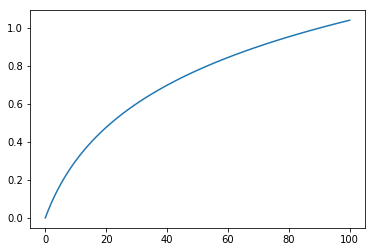

In [7]:
plt.plot([ math.log(anonymous(math.sqrt(i/10.)), 10) for i in range(0, 101, 1)])

# 3.Multiples of 3 and 5.

In [8]:
def sum_multify_35(num):
    total=0
    for i in range(num):
        if i%3==0 or i%5==0:
            total+=i
    return total

In [9]:
sum_multify_35(10)

23

In [10]:
sum_multify_35(1000)

233168

# Part.2 crawPTT

#### solution 1

In [11]:
from selenium import webdriver
from selenium import common

In [12]:
url='https://www.ptt.cc/bbs/Cross_Life/index.html'

In [13]:
driver = webdriver.Chrome('../chromedriver.exe')
driver.get(url)
driver.minimize_window()
driver.maximize_window()

In [14]:
class CrawResult():
    def __init__(self, author, title, block, time, content):
        self.author=author
        self.title=title
        self.block=block
        self.time=time
        self.content=content
    
    def showInfo(self):
        print('作者:', self.author)
        print('標題:', self.title)
        print('看板:', self.block)
        print('日期:', self.time)
        print('內文:', self.content)

In [15]:
def get_article():
    author = driver.find_element_by_xpath('//*[@id="main-content"]/div[1]/span[2]')
    author_text = author.text

    title = driver.find_element_by_xpath('//*[@id="main-content"]/div[3]')
    title_text = title.text

    block = driver.find_element_by_xpath('//*[@id="main-content"]/div[2]/span[2]')
    block_text = block.text

    time = driver.find_element_by_xpath('//*[@id="main-content"]/div[4]/span[2]')
    time_text = time.text

    lst = ['article-metaline-right', 'article-metaline', 'f2', 'push', 'f3']
    for _ in range(3):
        for i in lst:
            try:
                driver.execute_script("a=document.getElementsByClassName(\'{}\')".format(i))
                driver.execute_script('for (i=0;i<=a.length;i++){a[i].parentNode.removeChild(a[i])}')
                if i=='article-metaline':
                    driver.execute_script('for (i=0;i<=a.length;i++){a[i].parentNode.removeChild(a[i])}')
            except :
                pass
    content = driver.find_element_by_xpath('//*[@id="main-content"]')
    content_text = content.text
    craw_result = CrawResult(author_text, title_text, block_text, time_text, content_text)
    return craw_result

In [16]:
craw_results=[]
try:
    driver.find_element_by_id('main-container')
    r_ents=[]
    for i in range(2, 21):
        r_ents.append(driver.find_element_by_xpath('//*[@id="main-container"]/div[2]/div[{}]/div[2]/a'.format(i)))
    ents = [ent.get_attribute('href') for ent in r_ents]
    
    for ent in ents:
        driver.execute_script("window.location.assign(\'{}\')".format(ent))
        craw_result = get_article()
        craw_results.append(craw_result)
        
    time.sleep(2)
except e: 
    craw_result = get_article()
    craw_results.append(craw_result)

In [17]:
for result in craw_results:
    print(result.showInfo())
    print("============================")

作者: saltlake (SaltLake)
標題: 標題[問題] 大戶人家
看板: Cross_Life
日期: Fri Feb  9 05:14:35 2018
內文:  文獻裡面，古時候所謂大戶人家有所謂王半城或者賴半街

 那類，富有到全城有半數的土地都他家的，或者某市鎮上

 的某條繁華商業街，有一半的土地是他家的。或者說，某

 城鎮地方的某一類甚至幾類產業都是某家的。例如林記米

 店可以包括全鎮甚至全鄉，或者本縣的馬車行和碼頭苦力

 等運輸與搬運業，都被某人或某家族掌握等等。

   大陸改革開放之後至今，民間財富迅速累積，有沒有出現

 這類古時候的現象?或者說，現在大陸所謂的大戶人家，可以

 大到啥地步?

--
None
作者: saltlake (SaltLake)
標題: 標題[問題] 大陸過年的特色活動
看板: Cross_Life
日期: Tue Feb 13 10:19:32 2018
內文:   傳統活動之一是放鞭炮，但是現在似乎被禁了?

  另外就是家人圍爐看央視的春晚，但自改革至今

  ，各種新電台和網路興起等因素，春晚的光芒(素

  質)似乎大為下降，還是大陸多數人會做的過年活

  動之一嗎?

  除此之外，現在被認同是過年特色活動，而且還是

  多數大陸人歡迎或會做的活動，有啥?

--
None
作者: jaymin (JAY)
標題: 標題[請益]象印電子鍋-海外中國版
看板: Cross_Life
日期: Wed Feb 21 10:15:42 2018
內文: 各位好，不知道這種事物放在這適不適當，

也請大家見諒了。




小弟想要賣一台全新的象印電子鍋 NP-HIH10 5CUP

https://imgur.com/a/QAc7z

https://world.taobao.com/item-amp/547545562683.htm

由於我爸媽一時疏忽，非常開心的去日本抱了一台電子鍋回來。

結果開箱玩才發現電壓規格於台灣不同，

是中國版AC220 V的電壓的飯鍋。嗚嗚嗚...




接下來是價錢的部份了，日幣58400元，折合台幣為15709元。

在淘寶有看到此產品為，人民幣3350，折合台幣為15407元。

如果有人想要，我可以以台幣15000元賣出。

或著價錢怎樣都可以再談

#### solution 2

In [18]:
import requests
from bs4 import BeautifulSoup

In [19]:
url="https://www.ptt.cc/bbs/movie/index7049.html"
res=requests.get(url, cookies={'over18': '1'})
soup=BeautifulSoup(res.text,"html.parser")
web_list=[a.get('href') for a in soup.html.select("div.title a")]

In [20]:
def crawptt(link):
    res = requests.get('https://www.ptt.cc/'+link)
    soup =  BeautifulSoup(res.text,"html.parser")
    main_content = soup.find(id="main-content")

    filter_content=[ v for v in main_content.stripped_strings]

    text=''
    for  i,w in enumerate(filter_content):
        if w[:5]=='※ 發信站':
            break
        if i>=8:
            text+=w
            #print(w)
    text=('內文:', text)

    info=main_content.find_all(class_="article-meta-value")
    info_new=[(i[0],i[1].text) for i in zip(['作者:','看板:','標題:','時間:'], info)]

    info_new.append(text)

#     for i in info_new:
#         print(i[0],i[1])
        
    return info_new

In [21]:
final=[]
for i in web_list:
    final.append(crawptt(i))

In [22]:
for web in final:
    
    for i in web:
        print(i[0],i[1])
    print("============================")    
    

作者: qweewqq (風一樣的男子)
看板: movie
標題: [新聞] 泰拳混布袋戲 《暹羅訣》推布袋戲版配音
時間: Fri Aug 24 08:10:14 2018
內文: 泰拳混布袋戲 《暹羅訣》推「布袋戲版」配音預告

2018年08月23日 19:46 中時 潘鈺楨

熱血泰拳動畫電影《暹羅訣：九神戰甲》繼上回公開電影最新終極預告後，這回官方釋出
的居然是「布袋戲版」配音預告？為了能夠道地呈現布袋戲正統的氣口，片商這回還特別
邀請布袋戲傳人黃滙峰先生為電影獻聲演出，在此次合作中，讓黃滙峰驚訝的是，竟然能
在《暹羅訣：九神戰甲》中看到布袋戲經典之作《聖石傳說》的影子。

對於布袋戲配音預告的出爐，讓不少觀眾相當好奇是否真的會有布袋戲版正片問世，紛紛
敲碗期待看到正片，甚至還說「中文版可以找館長配音」！繼布袋戲創舉之作《東離劍遊
紀》首次以日本聲優配音布袋戲的創意搭配後，動畫電影《暹羅訣：九神戰甲》此次在預
告上也大玩創意，首次大膽以布袋戲配音泰國動畫片，用台灣本土文化「布袋戲」融合泰
國本土文化「泰拳」，嘗試激出更多不一樣的文化火花。

此次力邀曾與日本藝人西川貴教合作的布袋戲傳人「黃滙峰」先生跨刀為電影預告獻聲。
對他來說，首次配音「泰國動畫」是很特別的一次經驗，黃滙峰表示：「動畫的節奏會比
布袋戲還要快，所以我必須要加快自己的語速。台詞的部份我也把它改成布袋戲中常用的
台詞，因為有些對白照翻成布袋戲配音會很奇怪。」電影泰文原音，9月7日在台上映。

(中時 )https://www.chinatimes.com/realtimenews/20180823004420-260404--
作者: thronima (顆顆球)
看板: movie
標題: [片單] 科幻類型的恐怖片
時間: Fri Aug 24 09:58:30 2018
內文: 1. 請描述欲尋找電影的類型或特徵（請盡量描述清楚）
最近看了撕裂地平線很喜歡
想要找一樣是在星際裡冒險
在狹窄的太空艙內逃竄、躲藏
因為未知的原因或是怪獸都可以

2. 已知符合需求的電影或偏好的電影類型（為避免重複推文，請至少列舉一部）
撕裂地平線
異形、普羅米修斯
克洛佛悖論

3. 不喜歡的電影類型            （不需要板友推薦的電影，可填刺陵）

--
作者: lpbrother (LP哥